In [2]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [3]:
f1 = open('E:/Jupyter Notebook文件/house_price/train.csv')
f2 = open('E:/Jupyter Notebook文件/house_price/test.csv')
train = pd.read_csv(f1)
test = pd.read_csv(f2)
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [4]:
#变量分组，分为标签，数值型和字符型
target = train['SalePrice']
data = pd.concat([train, test], ignore_index=True)
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']
data_cat = data[categorical_columns]
data_num = data.drop(categorical_columns, axis=1)

In [5]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

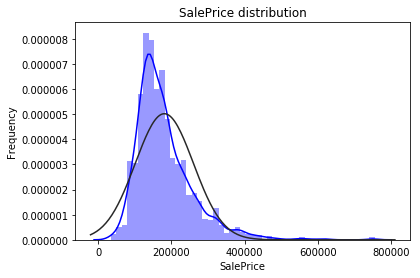

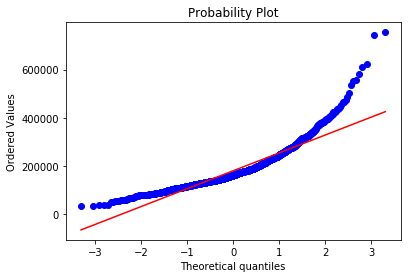

In [6]:
#正态检验
# Kernel Density Plot
sns.distplot(target,fit=norm,color='b');
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target);
# QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt,fit=norm)
plt.show()

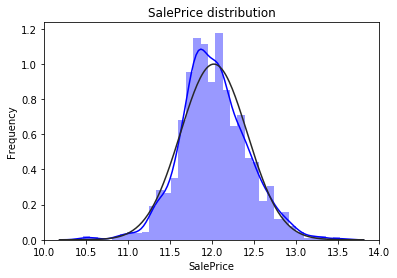

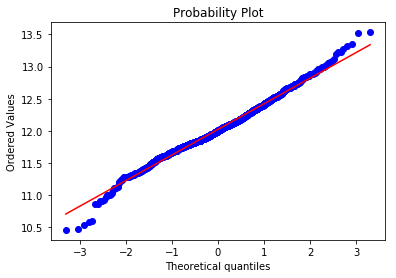

In [7]:
#做对数变换，让数据服从正态性分布
#对数处理
target = np.log1p(target)

# Kernel Density Plot
sns.distplot(target,fit=norm,color='b');
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target);
# QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

In [8]:
#查看缺失
total = data_num.isnull().sum().sort_values(ascending=False)
percent = (data_num.isnull().sum()/data_num.isnull().count()).sort_values(ascending=False)
missing_data_num = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_num[missing_data_num['Percent']>0]

,Total,Percent
SalePrice,1459,0.499829
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrArea,23,0.007879
BsmtFullBath,2,0.000685
BsmtHalfBath,2,0.000685
BsmtFinSF1,1,0.000343
BsmtFinSF2,1,0.000343
TotalBsmtSF,1,0.000343
BsmtUnfSF,1,0.000343


In [9]:
data_num1 = data_num.drop(["LotFrontage","SalePrice"],axis=1)

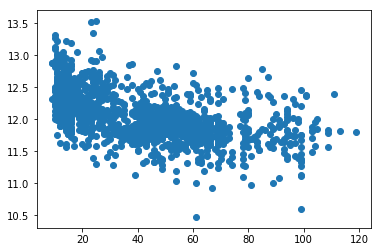

In [10]:
t_data = data_num1['GarageYrBlt'].apply(lambda x: 2019-x)
data_num1['GarageYrBlt'] = t_data
train['GarageYrBlt'] = t_data
plt.scatter(x=train['GarageYrBlt'],y=target)
plt.show()

In [11]:
data_num1 = data_num1.drop('GarageYrBlt',1)
data_num1["MasVnrArea"] = data_num1["MasVnrArea"].fillna(0)
for col in ('BsmtHalfBath','BsmtFullBath','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars'):
    mode = data_num1[col].mode()
    data_num1[col] = data_num1[col].fillna(mode[0])

In [12]:
total = data_num1.isnull().sum().sort_values(ascending=False)
percent = (data_num1.isnull().sum()/data_num1.isnull().count()).sort_values(ascending=False)
missing_data_num = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_num[missing_data_num['Percent']>0]

,Total,Percent


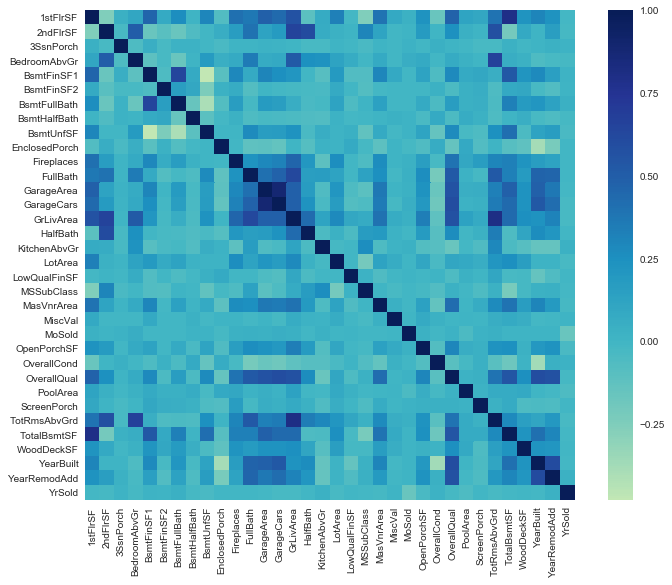

In [13]:
corrmat = data_num1.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu",square=True,center=0)

In [14]:
data_target = pd.concat([target,data_num1],axis=1)
data_target.head()

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,12.247699,856,854,0,3,706.0,0.0,1.0,0.0,150.0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,12.109016,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,12.317171,920,866,0,3,486.0,0.0,1.0,0.0,434.0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,11.849405,961,756,0,3,216.0,0.0,1.0,0.0,540.0,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,12.429220,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,...,5,8,0,0,9,1145.0,192,2000,2000,2008


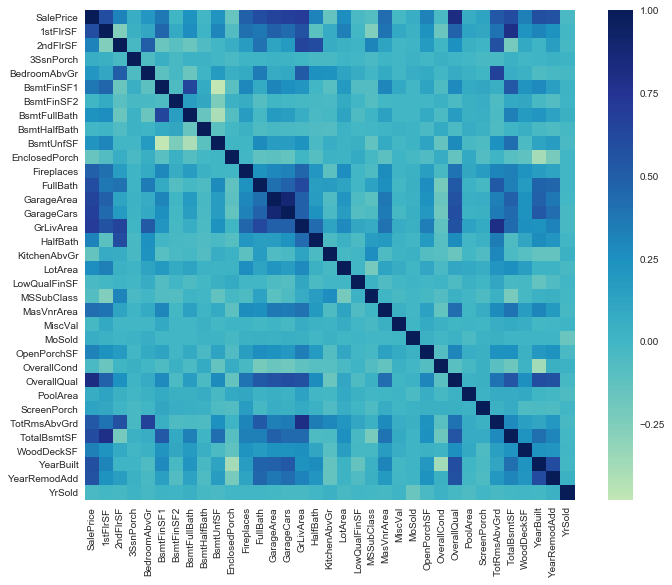

In [15]:
corrmat = data_target.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu",square=True,center=0)

In [16]:
corrmat['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

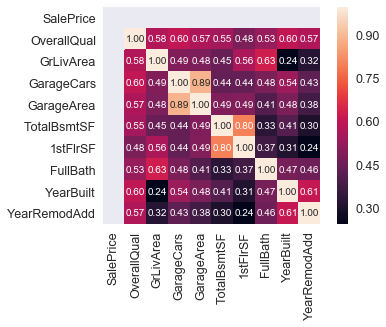

In [17]:
import numpy as np
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_target[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

对名义变量和有序变量进行处理

In [18]:
total = data_cat.isnull().sum().sort_values(ascending=False)
percent = (data_cat.isnull().sum()/data_cat.isnull().count()).sort_values(ascending=False)
missing_data_cat = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_cat[missing_data_cat['Percent']>0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092


In [19]:
#Garage车库相关变量
#将GarageCond中的车库质量替换成数值
data_cat['GarageCond']=data_cat['GarageCond'].replace(['Ex','Gd','TA','Fa','Po',],[5,4,3,2,1])

#将GarageQual中的车库质量替换成数值
data_cat['GarageQual']=data_cat['GarageQual'].replace(['Ex','Gd','TA','Fa','Po',],[5,4,3,2,1])

#将GarageFinish中的车库完成情况替换成数值
data_cat['GarageFinish']=data_cat['GarageFinish'].replace(['Fin','RFn','Unf',],[3,2,1])

#GarageType无意义变量，drop
data_cat.drop(['GarageType'],axis = 1, inplace = True)

In [20]:
#Basement地下室相关变量
#BsmtExposure
data_cat['BsmtExposure']=data_cat['BsmtExposure'].replace(['Gd','Av','Mn','No'],[4,3,2,1])

#BsmtQual
data_cat['BsmtQual']=data_cat['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#BsmtCond
data_cat['BsmtCond']=data_cat['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
#ExterQual
data_cat['ExterQual']=data_cat['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#ExterCond
data_cat['ExterCond']=data_cat['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
#HeatingQC
data_cat['HeatingQC']=data_cat['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
#KitchenQual
data_cat['KitchenQual'] = data_cat['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
#FireplaceQu
data_cat['FireplaceQu'] = data_cat['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
#Utilities 便利设施
data_cat['Utilities']=data_cat['Utilities'].replace(['AllPub','NoSewr','NoSeWa','ELO'],[4,3,2,1])
#PoolQC
data_cat['PoolQC']=data_cat['PoolQC'].replace(['Ex','Gd','TA','Fa'],[4,3,2,1])
#Fence
data_cat['Fence']=data_cat['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw'],[4,3,2,1])
#Alley
data_cat['Alley']=data_cat['Alley'].replace(['Pave','Grvl'],[2,1])

In [21]:
data_cat['Fence'] = data_cat['Fence'].fillna(0)
data_cat['PoolQC'] = data_cat['PoolQC'].fillna(0)
data_cat['FireplaceQu'] = data_cat['FireplaceQu'].fillna(0)
data_cat['BsmtCond'] = data_cat['BsmtCond'].fillna(0)
data_cat['BsmtQual'] = data_cat['BsmtQual'].fillna(0)
data_cat['BsmtExposure'] = data_cat['BsmtExposure'].fillna(0)
data_cat['GarageFinish'] = data_cat['GarageFinish'].fillna(0)
data_cat['GarageQual'] = data_cat['GarageQual'].fillna(0)
data_cat['GarageCond'] = data_cat['GarageCond'].fillna(0)
data_cat['Alley'] = data_cat['Alley'].fillna(0)

In [22]:
#将误判到数值变量中的变量移至名义变量
data_cat['OverallQual'] = data_num1['OverallQual']
data_cat['OverallCond'] = data_num1['OverallCond']
data_num1.drop(['OverallQual','OverallCond'],axis = 1, inplace = True)

In [23]:
#查看缺失
total = data_cat.isnull().sum().sort_values(ascending=False)
percent = (data_cat.isnull().sum()/data_cat.isnull().count()).sort_values(ascending=False)
missing_data_cat = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_cat[missing_data_cat['Percent']>0]

,Total,Percent
MiscFeature,2814,0.964029
BsmtFinType2,80,0.027407
BsmtFinType1,79,0.027064
MasVnrType,24,0.008222
MSZoning,4,0.001370
Utilities,2,0.000685
Functional,2,0.000685
Electrical,1,0.000343
SaleType,1,0.000343
Exterior2nd,1,0.000343


In [24]:
#缺失百分比大于0.1的变量删除，小于等于0.1的变量填充
missing_cat_drop = missing_data_cat[missing_data_cat['Percent'] > 0.1]
missing_cat_fill = missing_data_cat[missing_data_cat['Percent'] <= 0.1]

In [25]:
data_cat.drop(['MiscFeature'],axis = 1, inplace = True)

In [26]:
data_cat.BsmtFinType2.fillna(data_cat.BsmtFinType2.mode()[0], inplace=True)
data_cat.BsmtFinType1.fillna(data_cat.BsmtFinType1.mode()[0], inplace=True)
data_cat.MasVnrType.fillna(data_cat.MasVnrType.mode()[0], inplace=True)
data_cat.Electrical.fillna(data_cat.Electrical.mode()[0], inplace=True)

In [27]:
categorical_columns.remove('GarageType')
categorical_columns.remove('MiscFeature')
#查看缺失
total = data_cat.isnull().sum().sort_values(ascending=False)
percent = (data_cat.isnull().sum()/data_cat.isnull().count()).sort_values(ascending=False)
missing_data_cat = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_cat[missing_data_cat['Percent']>0]

,Total,Percent
MSZoning,4,0.001370
Utilities,2,0.000685
Functional,2,0.000685
SaleType,1,0.000343
Exterior2nd,1,0.000343
Exterior1st,1,0.000343
KitchenQual,1,0.000343


(array([  35.,    0.,    0., 1798.,    0.,    0.,  979.,    0.,    0.,
         107.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

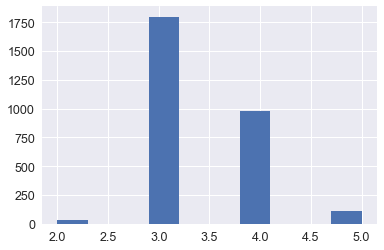

In [28]:
plt.hist(data_cat['ExterQual'])

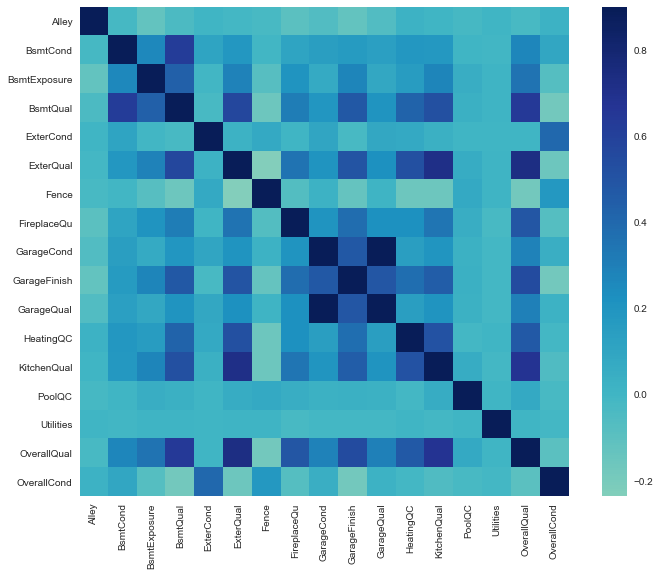

In [29]:
corrmat = data_cat.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu",vmax=0.9, square=True,center=0)